In [10]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

# 2. Load dataset
df = pd.read_csv('health_user.csv.xls')

# 3. Preprocess: One-hot encode categorical variables (except the target 'risk')
X = df.drop('risk', axis=1)
y = df['risk']
X = pd.get_dummies(X)

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 7. Save the trained model
joblib.dump(model, '../backend/model2.pkl')
print('✅ Logistic Regression model saved as backend/model2.pkl')

import json
feature_names = list(X_train.columns)
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)


Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40

✅ Logistic Regression model saved as backend/model2.pkl


In [5]:
from sklearn.linear_model import LogisticRegression
import joblib

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=2000)
logreg_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Save the trained Logistic Regression model for your Flask backend
joblib.dump(logreg_model, '../backend/model2.pkl')
print('✅ Logistic Regression model saved as backend/model2.pkl')

Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40

✅ Logistic Regression model saved as backend/model2.pkl


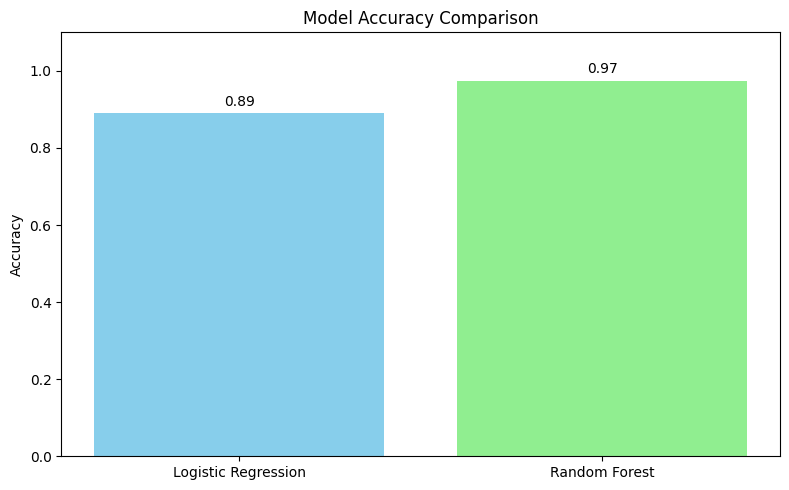

In [1]:
import matplotlib.pyplot as plt

# Accuracy values from evaluation
accuracy_logreg = 0.89  # Replace with your actual value
accuracy_rf = 0.975     # Replace with your actual value

models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_logreg, accuracy_rf]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add text labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40

Random Forest Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40



In [7]:
import joblib

# Save the trained model
joblib.dump(model, 'model2.pkl')

print("✅ Model saved successfully as model2.pkl")

✅ Model saved successfully as model2.pkl


In [9]:
import joblib
from sklearn.metrics import accuracy_score, classification_report

# Load test data (ensure X_test, y_test are defined as in previous cells)

# Load Random Forest model
rf_model = joblib.load('../backend/model.pkl')  # or 'model.pkl' if you saved it there
y_pred_rf = rf_model.predict(X_test)
print('Random Forest Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Load Logistic Regression model
logreg_model = joblib.load('model2.pkl')  # Update path if needed
y_pred_logreg = logreg_model.predict(X_test)
print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Random Forest Results:
Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40

Logistic Regression Results:
Accuracy: 0.975
              precision    recall  f1-score   support

        High       0.89      1.00      0.94         8
         Low       1.00      1.00      1.00        25
      Medium       1.00      0.86      0.92         7

    accuracy                           0.97        40
   macro avg       0.96      0.95      0.95        40
weighted avg       0.98      0.97      0.97        40

